<span style="background-color: #FFFF00"><h1> Notebook 0</h1> </span>

**Project: "Intra-Regional Migration and Transportation in New York Metro Area"**







<h2>
<code style="background:grey;color:black">Research Question:
</code>
</h2>

<p>
After midterm, our team was rethinking about the reserach interest and the stuff we have already done to rewrite our research question that is clearer and more narratives. The updated research introduction is as follows:<p>


<p>
Move to another city or move to a suburban? This is a question about two types of migration: inter-regional and intra-regional. The first one refers to long-distance moving that is more commonly discussed and generally associated with job relocation. The second one refers to relatively short-distance mobility that is more often seen in the real world and associated with the commuting choices between job and life.<p>
    <p>
Intra-regional migration takes up the majority of moving because the traditional relationship between living and working limits each individual's mobility level. However, in the light of the recent COVID pandemic, there’s increasing uncertainty about the future workstyle, which potentially further increases the intra-regional migration activities. <p>
    <p>
This project is particularly concerned about intra-regional migration and its impacts in relation to transit by using Greater New York Metro Area as the study area. Specifically, the first research question the project is trying to answer is the impacts of intra-regional migration on local demographics, economy, and housing conditions and their relationship to transit. The second research question is the roles transit plays in the development of local communities. 


<h2>
<code style="background:grey;color:black">Research Process:
</code>
</h2>

<p>
We also redesign the diagram for the research process we are following to make sure we have a good narratives and we are on the timeline. Our notebooks will be organized according to this narrative and process. The following screenshot is our design process diagram:<p>

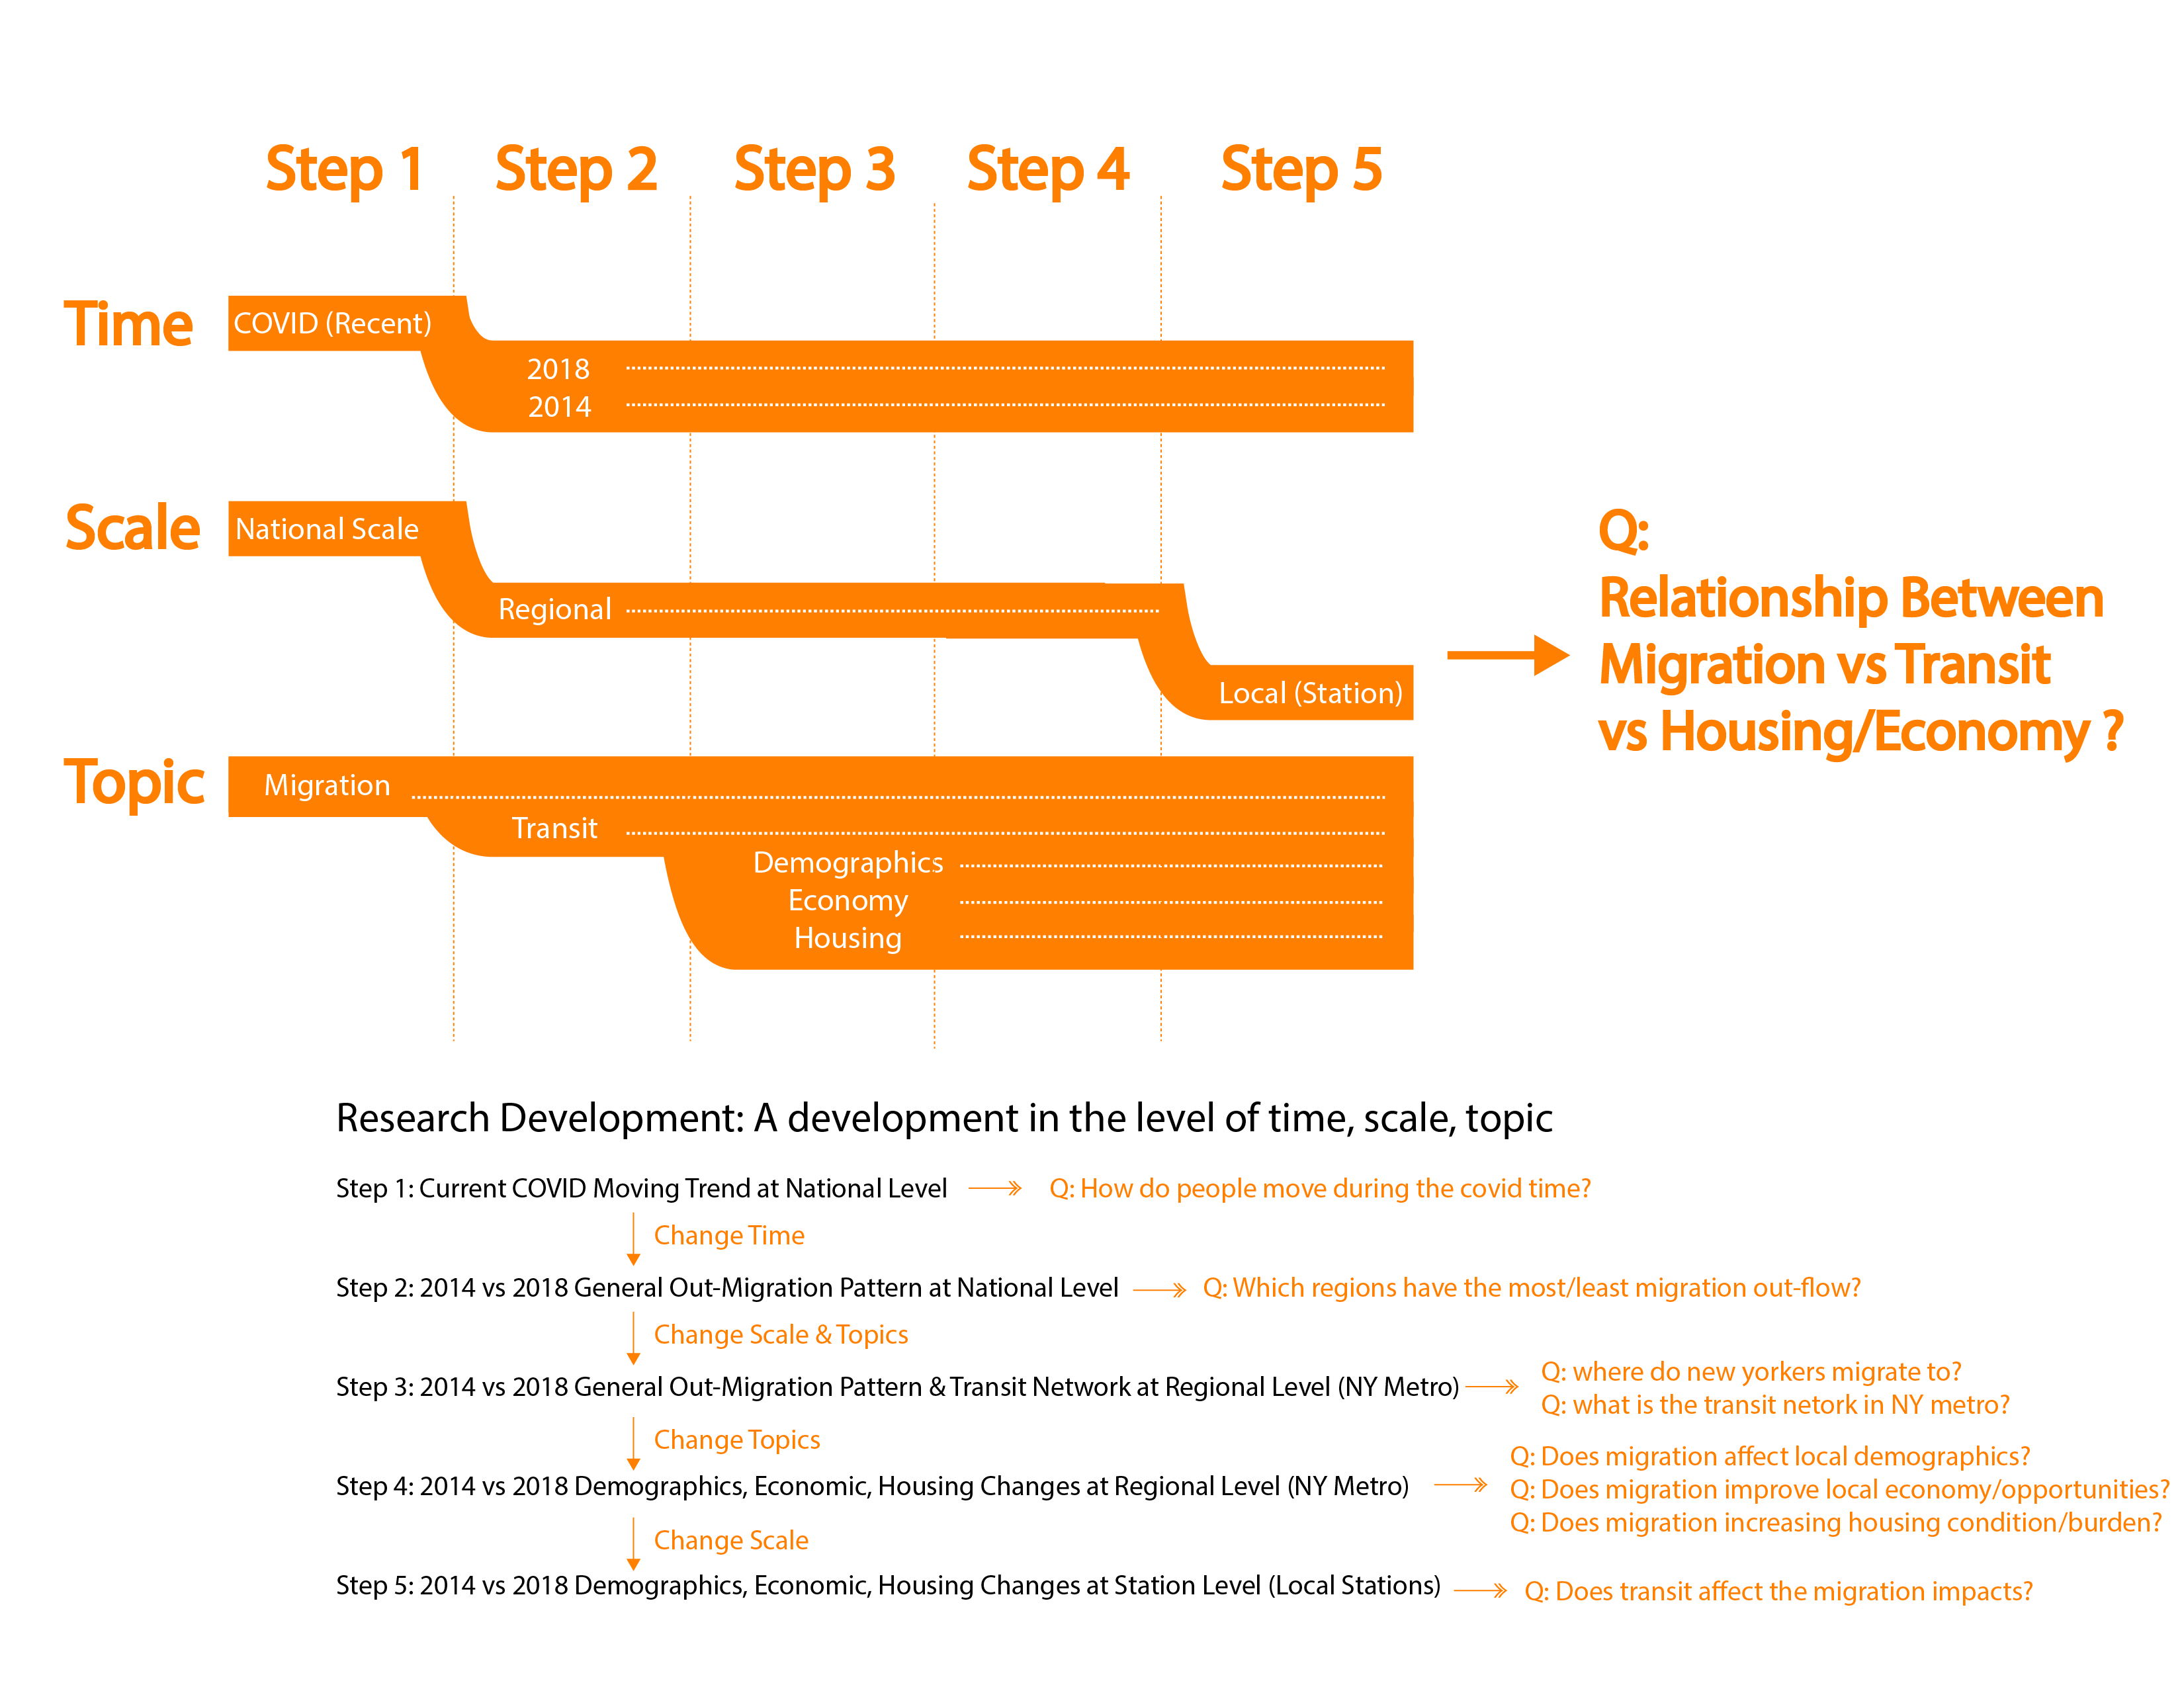

In [1]:
from IPython.display import Image
Image("data/Research_Diagram.jpg")

<h2>
<code style="background:grey;color:black">Project Progress Update:
</code>
</h2>

<p>
This week, our focus was to "finalize" our narrative to make sure we have a clear research project. As for the notebook/coding learning process, we incorporated the "def" function in our mapping process in the "Notebook 1" to simplify the graphs for all topics - they are super helpful in saving our workflow. Also, we were trying to play around the "buffer" functino and many interactive functions on Folium in the "Notebook 3" to explore how we can present our comparison (lots of data on one map) through different layers. <p>
    
<p>
As for the group collaboration, we still follow our previous apporach - we divide the projrect by contents so that everyone has the oppourtunity to work with every step of coding. In addition, this week, we started to combine our data and design our graph standard toeghter to make sure our project goes together<p>

<h2>
<code style="background:grey;color:black">Research Step 1 and 2
</code>
</h2>

<p>
In this section, we are presenting all background findings for the migration trend today (COVID) and ongoing (2018 vs 2014). The point we are trying to make is that migration is an ongoing developemnt process and intra-regional migration is more common for lots of metro ares<p>

<h2>
<code style="background:grey;color:black">Section 0. Import All Modules and Set Up Notebook
</code>
</h2>

In [2]:
# Import all modules I will be using in this notebook

import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [3]:
# Change some preset for better workspace

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.0f}'.format

<h2>
<code style="background:grey;color:black">Section 1. Reproduce and Visualize Moving Trend During COVID
</code>
</h2>

<h3>
<code style="background:grey;color:black">Section 1.1 Moving Trend in 2019 and 2020 COVID Time
</code>
</h3>


In this section, we hope to present the moving trendy during the COVID time. Due to the limited access to the dataset, we are going to reproduce the findings from the existing reserach (https://www.mymove.com/moving/covid-19/coronavirus-moving-trends/). 

In [4]:
# Import the CSV dataset

COVID_Total_rawdata = pd.read_csv('data/01_COVID_Total_Mover.csv')

In [5]:
# Take a look to make sure it looks good

COVID_Total_rawdata

Unnamed: 0     2019     2020  Average_Case
0        Feb  2030000  2090000             2
1        Mar  2400000  2910000          6077
2        Apr  2510000  2750000         29577
3        May  2740000  2630000         23340
4       June  2830000  2640000         28467
5       July  2870000  2960000         61882

In [6]:
# Check the dataset to see if all data are in the right data type and have no null values

COVID_Total_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    6 non-null      object
 1   2019          6 non-null      int64 
 2   2020          6 non-null      int64 
 3   Average_Case  6 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 320.0+ bytes


In [7]:
# Rename the columns to make it easier to read

COVID_Total_rawdata.columns = ['Month','2019','2020','Average_COVID_New_Case']

In [8]:
# Double check to see if all changes are made successfully

COVID_Total_rawdata

Month     2019     2020  Average_COVID_New_Case
0   Feb  2030000  2090000                       2
1   Mar  2400000  2910000                    6077
2   Apr  2510000  2750000                   29577
3   May  2740000  2630000                   23340
4  June  2830000  2640000                   28467
5  July  2870000  2960000                   61882

<h3>
<code style="background:yellow;color:red">Finding1: Moving trend during COVID and same period in 2019:
</code>
</h3>


In [9]:
# Make a subplot from this datset
# Add multiple layers of info. Change some styles. 

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(y=COVID_Total_rawdata['2019'],
                         x=COVID_Total_rawdata['Month'],
                         text= COVID_Total_rawdata['2019'],
                         name="2019",
                         textposition = 'top center',
                         mode='lines+markers+text',
                         marker=dict(color='#5D69B1', size=8),
                         line=dict(color='#1a8dff', width=2),
                         texttemplate = "%{y:.3s}"
                        ),
             secondary_y=True
             )

fig.add_trace(go.Scatter(y=COVID_Total_rawdata['2020'],
                         x=COVID_Total_rawdata['Month'],
                         name="2020",
                         text= COVID_Total_rawdata['2020'],
                         textposition = 'top center',
                         mode='lines+markers+text',
                         marker=dict(color='#5D69B1', size=8),
                         line=dict(color='#ff1a1a', width=2),
                         texttemplate = "%{y:.3s}"
                        ),
              secondary_y=True
             )

fig.add_trace(go.Bar(y=COVID_Total_rawdata['Average_COVID_New_Case'], 
                     x=COVID_Total_rawdata['Month'],
                    text= COVID_Total_rawdata['Average_COVID_New_Case'],
                    name="Average Daily New COVID Cases",
                    width=[0.25,0.25,0.25,0.25,0.25,0.25]
                    ),
              secondary_y=False
             )

fig.update_layout(height=600, width=1000)
fig.update_layout(legend_title_text = "Year")
fig.update_xaxes(title_text="<b>Month in 2019 and 2020</b>")
fig.update_yaxes(title_text="<b>Average Daily New COVID Cases</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Monthly Moving</b>", secondary_y=True)

fig.show()

<h3>
<code style="background:grey;color:black">Section 1.2 Moving Trend in Various States
</code>
</h3>


In [10]:
# Import the CSV file

COVID_StateMoving_rawdata = pd.read_csv('data/02_COVID_State_Moving.csv')

In [11]:
# Take a look to make sure it is okay

COVID_StateMoving_rawdata

State  Net_Moving
0              Michigan       45408
1        North Carolina       37971
2                 Texas       30603
3             New Jersy       25738
4             Minnesota       25315
5  District of Columbia      -15638
6               Arizona      -41923
7            California      -87750
8              New York     -117251
9               Florida     -235765

<h3>
<code style="background:yellow;color:red">The Finding2: 5 states with most net gains and 5 states with most net loss of moving during COVID:
</code>
</h3>


In [12]:
# Similarlly, make a bar chart to show the table above. 
# Add some arguments to make the chart looks better.

fig = go.Figure()

fig = px.bar(COVID_StateMoving_rawdata,
             y=COVID_StateMoving_rawdata['State'],
             x = COVID_StateMoving_rawdata['Net_Moving'],
             title='Top 5 States for Net Gain and Top 5 States for Net Loss of Moving',
             orientation = 'h',
             color=COVID_StateMoving_rawdata['Net_Moving'],
             color_continuous_scale='Viridis',
            )

fig.update_traces( textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(height=600, width=1000)
fig.update_xaxes(title_text="<b>Net Gain or Loss</b>")
fig.update_yaxes(title_text="<b>State</b>")


fig.show()

<h3>
<code style="background:grey;color:black">Section 1.3 Moving Trend in Various Cities and Areas
</code>
</h3>


In [13]:
# Import the new CSV

COVID_AreaMoving_rawdata = pd.read_csv('data/03_COVID_Area_Moving.csv')

In [14]:
#  Take a look to see if it is good

COVID_AreaMoving_rawdata

Area  Net_Moving
0            Katy, TX        4414
1        Richmond, TX        3000
2          Frisco, TX        2604
3    East Hampton, NY        2476
4      Georgetown, TX        2337
5         Leander, TX        2294
6         Cypress, TX        2147
7         Cumming, GA        2128
8       Riverview, FL        2093
9        Meridian, ID        2088
10     Fort Myers, FL      -11889
11   Philadelphia, PA      -12833
12        Houston, TX      -14883
13     Washington, DC      -15520
14         Naples, FL      -22100
15    Los Angeles, CA      -26438
16  San Francisco, CA      -27187
17        Chicago, IL      -31347
18       Brooklyn, NY      -43006
19       New York, NY     -110978

<h3>
<code style="background:yellow;color:red">Finding3: Top 5 cities/areas with most net gains and Top 5 cities/areas with most net loss of moving during COVID:
</code>
</h3>


In [15]:
# Make a chart to present the table above.
# Add some arguments to make the chart prettier

fig = go.Figure()

fig = px.bar(COVID_StateMoving_rawdata,
             y=COVID_AreaMoving_rawdata['Area'],
             x = COVID_AreaMoving_rawdata['Net_Moving'],
             title='Top 5 Cities/Areas for Net Gain and Top 5 Cities/Areas for Net Loss of Moving',
             orientation = 'h',
             color=COVID_AreaMoving_rawdata['Net_Moving'],
             color_continuous_scale='Viridis',
            )

fig.update_traces( textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(height=600, width=1000)
fig.update_xaxes(title_text="<b>Net Gain or Loss</b>")
fig.update_yaxes(title_text="<b>Cities/Areas</b>")

fig.show()

<h2>
<code style="background:grey;color:black">Section 2. Capture National Out-Migration Trend in 2018
</code>
</h2>


In this section, I will start working with Geo-data and census data to explore the general migration trend in 2018. Fisrt, I will prepare the geo-data for Metro-level. Then, I will prepare and work with census data to get some findings. Lastly, I will combine the geo-data with census data to visualize and map the findings.

Now, I will begin with the geo-dta for all metro reigions in the U.S.


<h3>
<code style="background:grey;color:black">Section 2.1 Prepare Geo-Data for Metro Areas in the U.S.
</code>
</h3>


In [16]:
# Import the geo data SHP file

metro_geodata_rawdata = gpd.read_file('data/05_Basemap_metroborder/tl_2019_us_cbsa.shp')

In [17]:
# Take a look to see if all data are valid and in the right data type. 
# There's one missing a lot of values, but it's okay because it's not important to our questions

metro_geodata_rawdata.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CSAFP     550 non-null    object  
 1   CBSAFP    938 non-null    object  
 2   GEOID     938 non-null    object  
 3   NAME      938 non-null    object  
 4   NAMELSAD  938 non-null    object  
 5   LSAD      938 non-null    object  
 6   MEMI      938 non-null    object  
 7   MTFCC     938 non-null    object  
 8   ALAND     938 non-null    int64   
 9   AWATER    938 non-null    int64   
 10  INTPTLAT  938 non-null    object  
 11  INTPTLON  938 non-null    object  
 12  geometry  938 non-null    geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 95.4+ KB


In [18]:
# Clean the dataset by keeping certain columns that is useful
# Also rename the columns to make it easier to read

columns_to_keep2=['GEOID','NAME','NAMELSAD','geometry']

metro_geodata_ready = metro_geodata_rawdata[columns_to_keep2]

metro_geodata_ready['State'] = metro_geodata_ready['NAME'].str[-2:]


metro_geodata_ready = metro_geodata_ready.drop(['NAME'],axis=1)

metro_geodata_ready.columns=['GEOID','Metro_Name','geometry','State']


/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
# Take a look to see if all changes are made successfully

metro_geodata_ready.head()

GEOID                                       Metro_Name  \
0  12020              Athens-Clarke County, GA Metro Area   
1  12060  Atlanta-Sandy Springs-Alpharetta, GA Metro Area   
2  12100           Atlantic City-Hammonton, NJ Metro Area   
3  12120                            Atmore, AL Micro Area   
4  12140                            Auburn, IN Micro Area   

                                            geometry State  
0  POLYGON ((-83.53739 33.96591, -83.53184 33.968...    GA  
1  POLYGON ((-85.33823 33.65312, -85.33842 33.654...    GA  
2  POLYGON ((-74.85675 39.42076, -74.85670 39.420...    NJ  
3  POLYGON ((-87.61542 31.04100, -87.61541 31.041...    AL  
4  POLYGON ((-85.19295 41.38001, -85.19296 41.381...    IN

In [20]:
# Create a new column called Region and assign the values to this column according to "State"
# This helps me filter the future sorting

metro_geodata_ready_contiguous = metro_geodata_ready
metro_geodata_ready_contiguous['Region'] = 'The_contiguous_US'

metro_geodata_ready_contiguous.loc[metro_geodata_ready_contiguous['State'] == 'PR','Region'] = 'Non_the_contiguous_US'
metro_geodata_ready_contiguous.loc[metro_geodata_ready_contiguous['State'] == 'HI','Region'] = 'Non_the_contiguous_US'
metro_geodata_ready_contiguous.loc[metro_geodata_ready_contiguous['State'] == 'AK','Region'] = 'Non_the_contiguous_US'



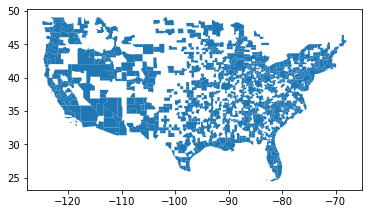

In [21]:
metro_geodata_ready_contiguous[metro_geodata_ready_contiguous.Region == 'The_contiguous_US'].plot()

<h3>
<code style="background:grey;color:red">The Following Dataset is Ready: Geo Data of All Metro Areas in the U.S.:
</code>
</h3>

In [22]:
# We mainly focus on the contiguous US part. So, we create a new dataframe that only contains the data in the contigous US.

metro_geodata_ready_Contiguous = metro_geodata_ready[metro_geodata_ready.Region =='The_contiguous_US']

<h3>
<code style="background:grey;color:black">Section 2.2. Clean and Sort Migration Census Data
</code>
</h3>


In [23]:
# First, I will import the raw data for metro to metro migration in 2018. This is a CSV file.
# Add some argument to make sure the data are imported in the right data type, since GEOID/FIPS codes are sometimes hard.

migration2018_rawdata = pd.read_csv('data/06_Migration_Metro_to_Metro_2018.csv',
                                    dtype={
                                       'Current Residence Metro Code1':str,
                                       'Residence 1 Year Ago Metro Code1':str
                                           }
                                           )

migration2018_rawdata.head()



Current Residence Metro Code1 Residence 1 Year Ago Metro Code1  \
0                         10180                            10740   
1                         10180                            11100   
2                         10180                            12060   
3                         10180                            12420   
4                         10180                            12580   

  Metropolitan Statistical Area of Current Residence  \
0                             Abilene, TX Metro Area   
1                             Abilene, TX Metro Area   
2                             Abilene, TX Metro Area   
3                             Abilene, TX Metro Area   
4                             Abilene, TX Metro Area   

   Population 1 Year and Over  Nonmovers  \
0                      167649     130384   
1                      167649     130384   
2                      167649     130384   
3                      167649     130384   
4                      167649     130384   

   Movers within Same Metropolitan Statistical Area  \
0                                             21221   
1                                             21221   
2                                             21221   
3                                             21221   
4                                             21221   

   Movers from Different Metropolitan Statistical Area2  \
0                                              11121      
1                                              11121      
2                                              11121      
3                                              11121      
4                                              11121      

   Movers from Elsewhere in the U.S. or Puerto Rico  Movers from Abroad3  \
0                                              3883                 1040   
1                                              3883                 1040   
2                                              3883                 1040   
3                                              3883                 1040   
4                                              3883                 1040   

  Metropolitan Statistical Area of Residence 1 Year Ago  \
0                         Albuquerque, NM Metro Area      
1                            Amarillo, TX Metro Area      
2       Atlanta-Sandy Springs-Roswell, GA Metro Area      
3                   Austin-Round Rock, TX Metro Area      
4           Baltimore-Columbia-Towson, MD Metro Area      

   Population 1 Year and Over.1  Nonmovers.1  \
0                        897771       773804   
1                        262324       212065   
2                       5667591      4846011   
3                       1990877      1655990   
4                       2757814      2390738   

   Movers within Same Metropolitan Statistical Area.1  \
0                                              88078    
1                                              34679    
2                                             625274    
3                                             241369    
4                                             263600    

   Movers to Different Metropolitan Statistical Area2  \
0                                              28944    
1                                              11114    
2                                             161709    
3                                              81180    
4                                              97429    

   Movers to Elsewhere in the U.S. or Puerto Rico  \
0                                            6945   
1                                            4466   
2                                           34597   
3                                           12338   
4                                            6047   

   Movers in Metro-to-Metro Flow  
0                              3  
1                            234  
2                            117  
3                            348  
4                       

In [24]:
# Check the data info to see if all data are good

migration2018_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Current Residence Metro Code1                          49739 non-null  object
 1   Residence 1 Year Ago Metro Code1                       49739 non-null  object
 2   Metropolitan Statistical Area of Current Residence     49739 non-null  object
 3   Population 1 Year and Over                             49739 non-null  int64 
 4   Nonmovers                                              49739 non-null  int64 
 5   Movers within Same Metropolitan Statistical Area       49739 non-null  int64 
 6   Movers from Different Metropolitan Statistical Area2   49739 non-null  int64 
 7   Movers from Elsewhere in the U.S. or Puerto Rico       49739 non-null  int64 
 8   Movers from Abroad3                                    4

In [25]:
# Clean the dataset by keeping the certain columns

Columns_to_keep1 = ['Residence 1 Year Ago Metro Code1','Movers in Metro-to-Metro Flow']

by_OutMigration1 = migration2018_rawdata [Columns_to_keep1]

In [26]:
# Take a look to make sure all changes are made

by_OutMigration1.head()

Residence 1 Year Ago Metro Code1  Movers in Metro-to-Metro Flow
0                            10740                              3
1                            11100                            234
2                            12060                            117
3                            12420                            348
4                            12580                              8

In [27]:
# Rename the columns to make it easier to read

by_OutMigration1.columns =['GEOID','Out_Migration_Population']

by_OutMigration1.head()

GEOID  Out_Migration_Population
0  10740                         3
1  11100                       234
2  12060                       117
3  12420                       348
4  12580                         8

In [28]:
# Sum all migration population by their GEOID so that I can have a total number for each GEOID

by_OutMigration1_group = by_OutMigration1.groupby(by=["GEOID"]).sum()

In [29]:
# Take a look to make sure it is okay

by_OutMigration1_group.head()

Out_Migration_Population
GEOID                          
10180                      8270
10380                     11704
10420                     25964
10500                      5509
10540                      6686

In [30]:
# Sort the chart by the population

by_OutMigration1_sort = by_OutMigration1_group.sort_values(by='Out_Migration_Population', ascending=False)

In [31]:
# Take a look to see if the change are made

by_OutMigration1_sort.head()

Out_Migration_Population
GEOID                          
35620                    460501
31080                    365670
16980                    249120
47900                    241889
41860                    184898

<h3>
<code style="background:grey;color:black">Section 2.3. Merge Geo-data with census data
</code>
</h3>


In [32]:
# Merge this dataset with the geo data I made in the beginning of the notebook

by_OutMigration1_ready = metro_geodata_ready.merge(by_OutMigration1_sort,
                                                   on='GEOID'
                                                  )

In [33]:
# Add a new column called "Region" and give the values to this column by GEOID

by_OutMigration1_ready['Region'] = 'The_contiguous_US'

by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '39380','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '46520','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '11260','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '21820','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '45940','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '41980','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '38660','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '27980','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '10380','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '32420','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '11640','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '41900','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '25020','Region'] = 'Non_the_contiguous_US'



In [34]:
# Take a look it to make sure the categories are good

by_OutMigration1_ready.head()

GEOID                                       Metro_Name  \
0  12020              Athens-Clarke County, GA Metro Area   
1  12060  Atlanta-Sandy Springs-Alpharetta, GA Metro Area   
2  12100           Atlantic City-Hammonton, NJ Metro Area   
3  12220                    Auburn-Opelika, AL Metro Area   
4  12260        Augusta-Richmond County, GA-SC Metro Area   

                                            geometry State             Region  \
0  POLYGON ((-83.53739 33.96591, -83.53184 33.968...    GA  The_contiguous_US   
1  POLYGON ((-85.33823 33.65312, -85.33842 33.654...    GA  The_contiguous_US   
2  POLYGON ((-74.85675 39.42076, -74.85670 39.420...    NJ  The_contiguous_US   
3  POLYGON ((-85.29322 32.73073, -85.28826 32.730...    AL  The_contiguous_US   
4  POLYGON ((-82.21865 33.68630, -82.21856 33.686...    SC  The_contiguous_US   

   Out_Migration_Population  
0                      8686  
1                    161709  
2                     12405  
3                     10146  
4                     20002

In [35]:
# Since we focus on the contiguous US part, we create a new datafram that only contains the data from this region

by_OutMigration1_ready_Contiguous = by_OutMigration1_ready[by_OutMigration1_ready.Region =='The_contiguous_US']

<h3>
<code style="background:grey;color:red">The Following Dataset is Ready: Data of All Metro Areas Out-Migration Population in the U.S.:
</code>
</h3>

In [36]:
# Take a look to double check about the change

by_OutMigration1_ready_Contiguous.head()

GEOID                                       Metro_Name  \
0  12020              Athens-Clarke County, GA Metro Area   
1  12060  Atlanta-Sandy Springs-Alpharetta, GA Metro Area   
2  12100           Atlantic City-Hammonton, NJ Metro Area   
3  12220                    Auburn-Opelika, AL Metro Area   
4  12260        Augusta-Richmond County, GA-SC Metro Area   

                                            geometry State             Region  \
0  POLYGON ((-83.53739 33.96591, -83.53184 33.968...    GA  The_contiguous_US   
1  POLYGON ((-85.33823 33.65312, -85.33842 33.654...    GA  The_contiguous_US   
2  POLYGON ((-74.85675 39.42076, -74.85670 39.420...    NJ  The_contiguous_US   
3  POLYGON ((-85.29322 32.73073, -85.28826 32.730...    AL  The_contiguous_US   
4  POLYGON ((-82.21865 33.68630, -82.21856 33.686...    SC  The_contiguous_US   

   Out_Migration_Population  
0                      8686  
1                    161709  
2                     12405  
3                     10146  
4                     20002

<h3>
<code style="background:grey;color:black">Section 2.4 Produce findings and Visulize them in the form of maps
</code>
</h3>


In [37]:
# In order to add them into basemap, I have to convert the dataset into CRS format

migration1_web_mercator = by_OutMigration1_ready_Contiguous.to_crs(epsg=3857)
metromap_web_mercator = metro_geodata_ready_Contiguous.to_crs(epsg=3857)

<h3>
<code style="background:yellow;color:red">Finding4: Map showing the number of out-migration popuulation by county:
</code>
</h3>


Text(0.5, 1.0, 'Metro-Level Out-Migration Population')

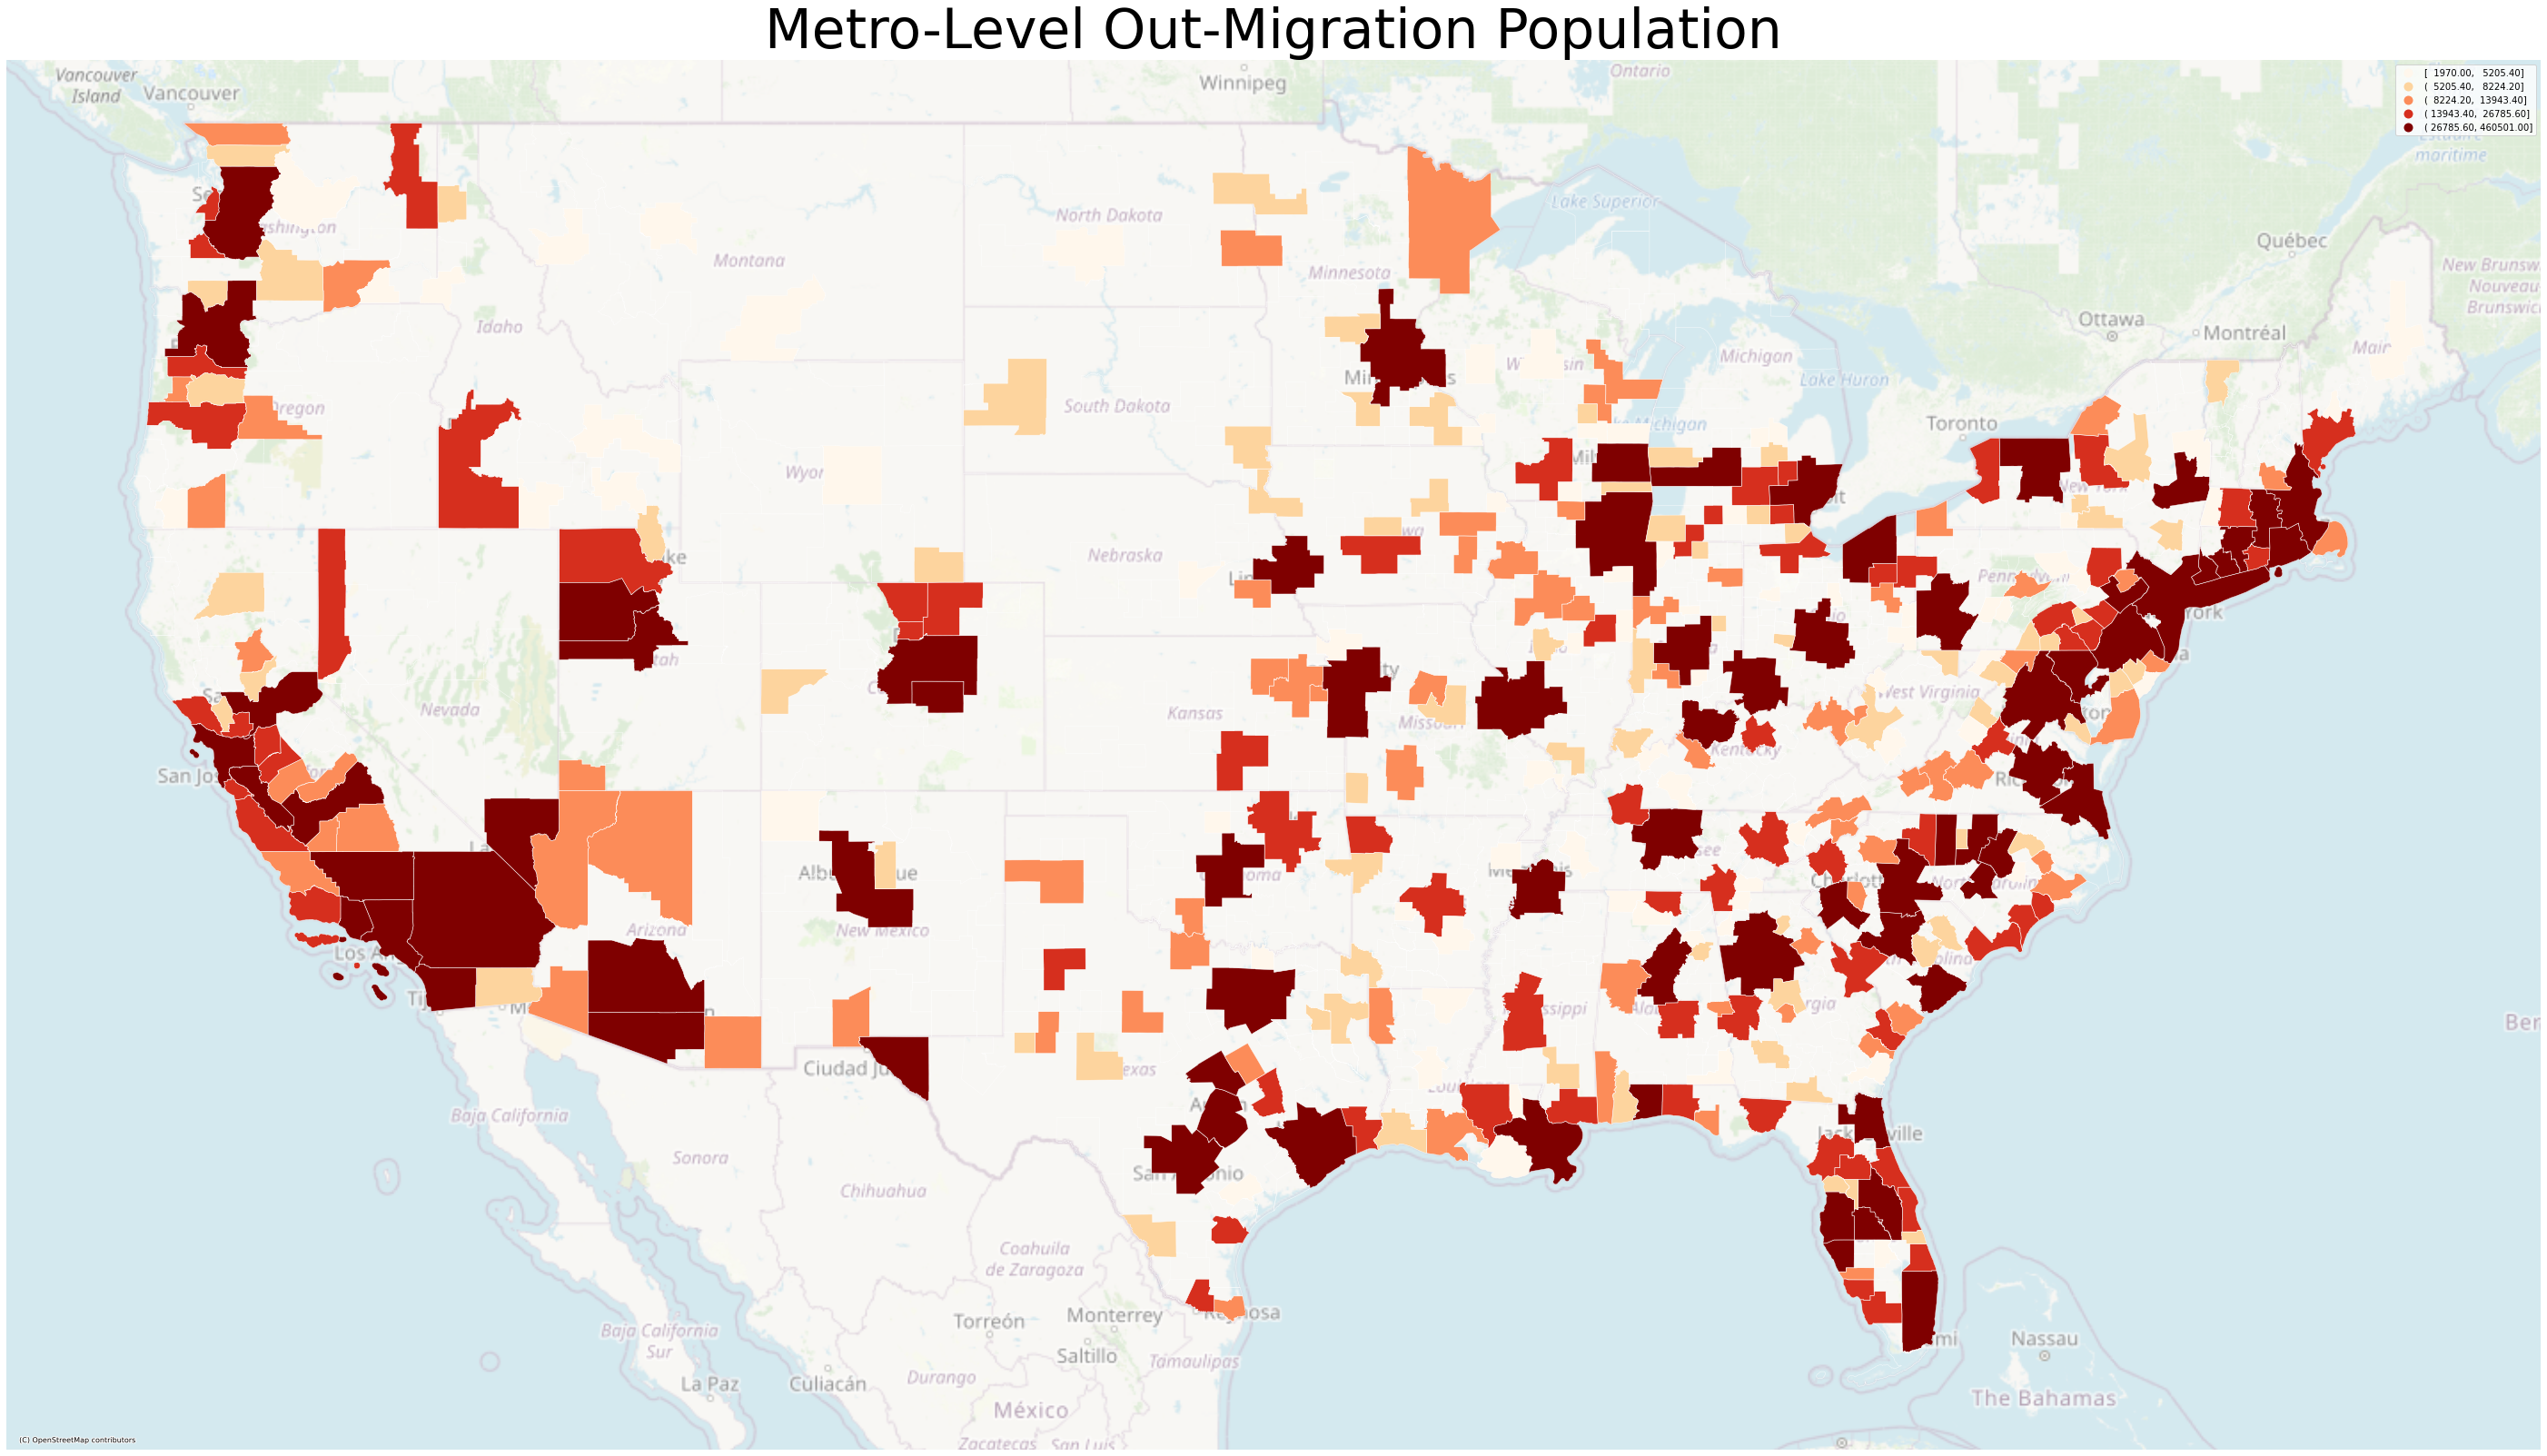

In [38]:
# Create a subplot to show the data from the previous sections
# Add layers of basemap and data. Add some argument to make it clear in presentation.

fig, axs = plt.subplots(1,1, figsize=(50, 30))
ax = axs

migration1_web_mercator.plot(ax=ax,
                             cmap='OrRd',
                             column = 'Out_Migration_Population',
                             scheme='Quantiles',
                             legend=True,
                                                        )


metromap_web_mercator.plot(ax=ax,
                                                                           facecolor='none',
                                                                           edgecolor='white',
                                                                            lw=0.5,
                                                                            alpha=0.8)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

ax.axis("off")
ax.set_title("Metro-Level Out-Migration Population",fontsize = 60)


In [39]:
# I want to the top 5 and bottom 5 data from the list. I create a new dataframe from the old one

by_OutMigration1_top5andbottom5 = by_OutMigration1_sort.iloc[np.r_[0:5, -5:0]]


In [40]:
# Take a look to see if this is what I want

by_OutMigration1_top5andbottom5

Out_Migration_Population
GEOID                          
35620                    460501
31080                    365670
16980                    249120
47900                    241889
41860                    184898
20220                      2577
19180                      2442
16220                      2263
37620                      2047
30300                      1970

In [41]:
# Merge the dataset with the geo data

by_OutMigration1_top5andbottom5 = by_OutMigration1_top5andbottom5.merge(metro_geodata_ready_contiguous,
                                                                        on='GEOID',
                                                                        how='left'
                                                                       )
by_OutMigration1_top5andbottom5

GEOID  Out_Migration_Population  \
0  35620                    460501   
1  31080                    365670   
2  16980                    249120   
3  47900                    241889   
4  41860                    184898   
5  20220                      2577   
6  19180                      2442   
7  16220                      2263   
8  37620                      2047   
9  30300                      1970   

                                          Metro_Name  \
0   New York-Newark-Jersey City, NY-NJ-PA Metro Area   
1      Los Angeles-Long Beach-Anaheim, CA Metro Area   
2      Chicago-Naperville-Elgin, IL-IN-WI Metro Area   
3  Washington-Arlington-Alexandria, DC-VA-MD-WV M...   
4      San Francisco-Oakland-Berkeley, CA Metro Area   
5                             Dubuque, IA Metro Area   
6                            Danville, IL Metro Area   
7                              Casper, WY Metro Area   
8                  Parkersburg-Vienna, WV Metro Area   
9                         Lewiston, ID-WA Metro Area   

                                            geometry State             Region  
0  POLYGON ((-74.88982 40.78773, -74.88971 40.787...    PA  The_contiguous_US  
1  MULTIPOLYGON (((-118.12590 33.69715, -118.1557...    CA  The_contiguous_US  
2  POLYGON ((-88.60224 41.63139, -88.61185 41.631...    WI  The_contiguous_US  
3  POLYGON ((-78.28480 38.75932, -78.29007 38.766...    WV  The_contiguous_US  
4  MULTIPOLYGON (((-122.61228 37.81522, -122.6260...    CA  The_contiguous_US  
5  POLYGON ((-91.13089 42.47126, -91.13115 42.471...    IA  The_contiguous_US  
6  POLYGON ((-87.92944 40.26969, -87.92943 40.270...    IL  The_contiguous_US  
7  POLYGON ((-106.91286 42.43319, -106.91416 42.4...    WY  The_contiguous_US  
8  POLYGON ((-81.58145 39.02618, -81.59519 39.031...    WV  The_contiguous_US  
9  POLYGON ((-116.91607 45.99536, -116.91626 45.9...    WA  The_contiguous_US

<h3>
<code style="background:yellow;color:red">Finding5: Top 5 and bottom 5 of out-migration population metro regions:
</code>
</h3>


In [42]:
# Creat a bar chart using the data above.

fig = px.bar(by_OutMigration1_top5andbottom5,
       y='Metro_Name',
       x = 'Out_Migration_Population',
       title='Top 5 and Bottom 5 of Metro Regions with Out-Migration Population',
             orientation = 'h',
             )

fig.update_traces( textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

<h2>
<code style="background:grey;color:black">Section 3. Look for where those out-migration people go
</code>
</h2>

In this section, I will begin working with the raw data again. But for this time, I will sort the dataset by the destination so that I know where people migrarte to

<h3>
<code style="background:grey;color:black">Section 3.1 Clean and sort the data
</code>
</h3>


In [43]:
# Double check this is the right data to work with

migration2018_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Current Residence Metro Code1                          49739 non-null  object
 1   Residence 1 Year Ago Metro Code1                       49739 non-null  object
 2   Metropolitan Statistical Area of Current Residence     49739 non-null  object
 3   Population 1 Year and Over                             49739 non-null  int64 
 4   Nonmovers                                              49739 non-null  int64 
 5   Movers within Same Metropolitan Statistical Area       49739 non-null  int64 
 6   Movers from Different Metropolitan Statistical Area2   49739 non-null  int64 
 7   Movers from Elsewhere in the U.S. or Puerto Rico       49739 non-null  int64 
 8   Movers from Abroad3                                    4

In [44]:
# Clean the data by keeping only the columns that we want.
# Also rename them to make it easier to read

Columns_to_keep5 =['Residence 1 Year Ago Metro Code1',
                   'Metropolitan Statistical Area of Residence 1 Year Ago',
                  'Population 1 Year and Over.1',
                  'Nonmovers.1',
                  'Movers within Same Metropolitan Statistical Area.1',
                  'Movers to Different Metropolitan Statistical Area2',
                  'Movers to Elsewhere in the U.S. or Puerto Rico']

migration2018_OutMigration_Rawdata = migration2018_rawdata[Columns_to_keep5]


migration2018_OutMigration_Rawdata.columns = ['GEOID','Metro_Name','Population','Non_Movers','Within_Metro','Different_Metro','Non_Metro']

In [45]:
# Double check to see if the changes are made

migration2018_OutMigration_Rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GEOID            49739 non-null  object
 1   Metro_Name       49739 non-null  object
 2   Population       49739 non-null  int64 
 3   Non_Movers       49739 non-null  int64 
 4   Within_Metro     49739 non-null  int64 
 5   Different_Metro  49739 non-null  int64 
 6   Non_Metro        49739 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.7+ MB


In [46]:
# After realizing there are some duplicates, I want to delete those extra data

migration2018_OutMigration_Rawdata = migration2018_OutMigration_Rawdata.drop_duplicates()

In [47]:
# Create a new column for "Out-Migration Popuulation" by calculating the difference between the other two columns

migration2018_OutMigration_Rawdata['Out_Migration_Population'] = migration2018_OutMigration_Rawdata['Population'] - migration2018_OutMigration_Rawdata['Non_Movers']

In [48]:
# Double check if the changes are made

migration2018_OutMigration_Rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 4061
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GEOID                     390 non-null    object
 1   Metro_Name                390 non-null    object
 2   Population                390 non-null    int64 
 3   Non_Movers                390 non-null    int64 
 4   Within_Metro              390 non-null    int64 
 5   Different_Metro           390 non-null    int64 
 6   Non_Metro                 390 non-null    int64 
 7   Out_Migration_Population  390 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.4+ KB


Next, I will do a series of data sorting in order to find the top 5 cities for each "moving category"

In [49]:
# Sort the dataset by Total Out-Migration Population 
# Save it as a new dataframe

Top5_OutMigration_raw = migration2018_OutMigration_Rawdata.sort_values(by='Out_Migration_Population', ascending=False)
Top5_OutMigration = Top5_OutMigration_raw.head(5)
Top5_OutMigration

GEOID                                        Metro_Name  Population  \
58  35620  New York-Newark-Jersey City, NY-NJ-PA Metro Area    19847550   
48  31080     Los Angeles-Long Beach-Anaheim, CA Metro Area    13137459   
14  16980     Chicago-Naperville-Elgin, IL-IN-WI Metro Area     9479646   
21  19100        Dallas-Fort Worth-Arlington, TX Metro Area     7073136   
35  26420   Houston-The Woodlands-Sugar Land, TX Metro Area     6593374   

    Non_Movers  Within_Metro  Different_Metro  Non_Metro  \
58    17909377       1444576           460501      33096   
48    11627233       1126203           365670      18353   
14     8236723        953743           249120      40060   
21     6006575        848993           174694      42874   
35     5650836        758679           148881      34978   

    Out_Migration_Population  
58                   1938173  
48                   1510226  
14                   1242923  
21                   1066561  
35                    942538

In [50]:
# Sort the dataset by the population for moving within the same metro area
# Save it as a new dataframe

Top5_WithinMetro_raw = migration2018_OutMigration_Rawdata.sort_values(by='Within_Metro', ascending=False)
Top5_WithinMetro = Top5_WithinMetro_raw.head(5)
Top5_WithinMetro

GEOID                                        Metro_Name  Population  \
58  35620  New York-Newark-Jersey City, NY-NJ-PA Metro Area    19847550   
48  31080     Los Angeles-Long Beach-Anaheim, CA Metro Area    13137459   
14  16980     Chicago-Naperville-Elgin, IL-IN-WI Metro Area     9479646   
21  19100        Dallas-Fort Worth-Arlington, TX Metro Area     7073136   
35  26420   Houston-The Woodlands-Sugar Land, TX Metro Area     6593374   

    Non_Movers  Within_Metro  Different_Metro  Non_Metro  \
58    17909377       1444576           460501      33096   
48    11627233       1126203           365670      18353   
14     8236723        953743           249120      40060   
21     6006575        848993           174694      42874   
35     5650836        758679           148881      34978   

    Out_Migration_Population  
58                   1938173  
48                   1510226  
14                   1242923  
21                   1066561  
35                    942538

In [51]:
# Sort the dataset by the population for moving to different metro areas
# Save it as a new dataframe

Top5_DifferentMetro_raw = migration2018_OutMigration_Rawdata.sort_values(by='Different_Metro', ascending=False)
Top5_DifferentMetro = Top5_DifferentMetro_raw.head(5)
Top5_DifferentMetro

GEOID                                         Metro_Name  Population  \
58  35620   New York-Newark-Jersey City, NY-NJ-PA Metro Area    19847550   
48  31080      Los Angeles-Long Beach-Anaheim, CA Metro Area    13137459   
14  16980      Chicago-Naperville-Elgin, IL-IN-WI Metro Area     9479646   
97  47900  Washington-Arlington-Alexandria, DC-VA-MD-WV M...     6028387   
80  41860       San Francisco-Oakland-Hayward, CA Metro Area     4595540   

    Non_Movers  Within_Metro  Different_Metro  Non_Metro  \
58    17909377       1444576           460501      33096   
48    11627233       1126203           365670      18353   
14     8236723        953743           249120      40060   
97     5143346        623001           241889      20151   
80     4017852        381956           184898      10834   

    Out_Migration_Population  
58                   1938173  
48                   1510226  
14                   1242923  
97                    885041  
80                    577688

In [52]:
# Sort the dataset by the population for moving to non metro areas
# Save it as a new dataframe

Top5_NonMetro_raw = migration2018_OutMigration_Rawdata.sort_values(by='Non_Metro', ascending=False)
Top5_NonMetro = Top5_NonMetro_raw.head(5)
Top5_NonMetro

GEOID                                        Metro_Name  Population  \
21  19100        Dallas-Fort Worth-Arlington, TX Metro Area     7073136   
14  16980     Chicago-Naperville-Elgin, IL-IN-WI Metro Area     9479646   
35  26420   Houston-The Woodlands-Sugar Land, TX Metro Area     6593374   
2   12060      Atlanta-Sandy Springs-Roswell, GA Metro Area     5667591   
58  35620  New York-Newark-Jersey City, NY-NJ-PA Metro Area    19847550   

    Non_Movers  Within_Metro  Different_Metro  Non_Metro  \
21     6006575        848993           174694      42874   
14     8236723        953743           249120      40060   
35     5650836        758679           148881      34978   
2      4846011        625274           161709      34597   
58    17909377       1444576           460501      33096   

    Out_Migration_Population  
21                   1066561  
14                   1242923  
35                    942538  
2                     821580  
58                   1938173

<h3>
<code style="background:yellow;color:red">Finding6: Top 5 Destination for Out-Migration Population:
</code>
</h3>


In [53]:
# Make a subplot to show the total migration data

fig = make_subplots(rows=1, 
                    cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02
                    )

fig.add_trace(go.Bar(y=Top5_OutMigration['Metro_Name'], 
                     x=Top5_OutMigration['Out_Migration_Population'],
                    text= Top5_OutMigration['Out_Migration_Population'],
                     textposition="outside",
                     orientation = 'h',
                    name="Total Out-Migration_Population",
                    ),
              row=1, col=1)

fig.update_layout(height=500, width=1000,
                  title_text="Top 5 Metro Area for Out-Migration")

fig.update_layout(legend_title_text = "Metro Area")
fig.update_layout(legend_font_size=11)
fig.update_layout(legend_title_font_size=15)
fig.show()

<h3>
<code style="background:yellow;color:red">Finding7: Top 5 Destination for moving within the same metro, to different metros, and to non metro areas:
</code>
</h3>


In [54]:
# Then, I want to make a subplot that contains three moving categories with each dataset so that we can compare them

fig = make_subplots(rows=3, 
                    cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02
                    )


fig.add_trace(go.Bar(y=Top5_DifferentMetro['Metro_Name'], 
                     x=Top5_DifferentMetro['Different_Metro'],
                    text= Top5_DifferentMetro['Different_Metro'],
                     textposition="outside",
                     orientation = 'h',
                    name="Move to Different Metro Area"),
              row=1, col=1,)

fig.add_trace(go.Bar(y=Top5_WithinMetro['Metro_Name'], 
                     x=Top5_WithinMetro['Within_Metro'],
                    text= Top5_WithinMetro['Within_Metro'],
                     textposition="outside",
                     orientation = 'h',
                    name="Move within Metro Area"),
              row=2, col=1,)

fig.add_trace(go.Bar(y=Top5_NonMetro['Metro_Name'], 
                     x=Top5_NonMetro['Non_Metro'],
                    text= Top5_NonMetro['Non_Metro'],
                     textposition="outside",
                     orientation = 'h',
                    name="Move to Non-Metro Area",
                    ),row=3, col=1,)

fig.update_layout(height=1000, width=1000,
                  title_text="Top 5 Metro Area for Out-Migration")

fig.update_layout(legend_title_text = "Metro Area")
fig.update_layout(legend_font_size=11)
fig.update_layout(legend_title_font_size=15)
fig.show()

<h2>
<code style="background:grey;color:black">Section 4. Conclusion
</code>
</h2>

After finishing those code writing and analyzing, I am able to present what the migration trend look like during the COVID pandemic and the general migration trend at the national scale. 